In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=11)

#Decision Tree Classifer 생성
dt_clf = DecisionTreeClassifier(random_state= 156)

# DecisionTreeClassifer 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [4]:
#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot파일 생성
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris.target_names,
                feature_names = iris.feature_names, impurity = True, filled = True)


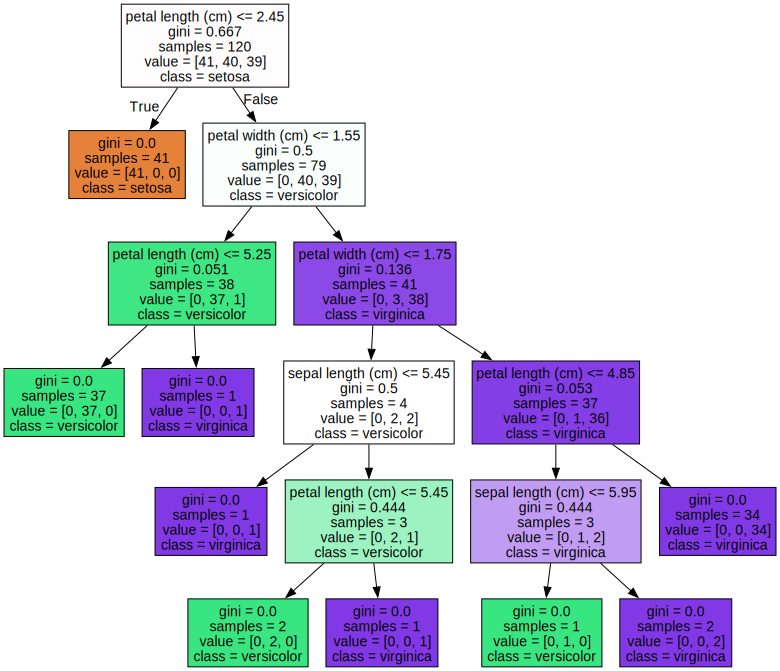

In [5]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

pred = dt_clf.predict(X_test)
print("accuracy :", np.round(accuracy_score(y_test,pred),3))
print("confusion matrix :\n", confusion_matrix(y_test,pred))
print('classification report :\n', classification_report(y_test,pred, target_names = iris.target_names))


accuracy : 0.933
confusion matrix :
 [[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
classification report :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [12]:
#feature의 중요도 
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [ ]:
import seaborn as sns
%matplotlib inline


In [15]:
#하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[2,4,6,8,10],
    'min_samples_split' : [2,5,10,20],
    'min_samples_leaf' : [1,2,4,8],
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=11), 
             param_grid= params,
             scoring= 'accuracy',
             cv = 5,
             verbose= 1
             )

grid_search.fit(X_train, y_train)
print('최고 적합한 파라미터', grid_search.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
최고 적합한 파라미터 {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [17]:
best_model = grid_search.best_estimator_
best_pred = best_model.predict(X_test)
accuracy_score(y_test, best_pred )

0.8666666666666667